In [ ]:
#!pip list

# **Import Libary**


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

Google Drive Mount and Unzip Dataset


In [ ]:
from IPython.lib.display import exists
#Unzip file
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

zip_file_path = '/content/drive/My Drive/Dataset/Ship.zip'
extraction_path = '/content/data_set/Ship'

os.makedirs(extraction_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))


In [ ]:
# Add new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(3, activation='softmax')(x)  # 3 classes: battle ship, patrol ship, submarine

# Assign transfer base model + new layers to model
model = Model(inputs=base_model.input, outputs=preds)
model.summary()

# Assign Trainable layers and freeze layer
for layer in model.layers[:86]:
    layer.trainable = False  # Freeze base model
for layer in model.layers[86:]:
    layer.trainable = True  # Unfreeze new added denses

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)

0 input_6
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [ ]:
import os
print(os.listdir())

['.config', 'data_set', 'drive', 'sample_data']


In [ ]:
# Defind Variable
bs = 32
seed_value = 42
seed_val = 123


# Create an instance of the data generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)


# Create Train Image generator
train_generator = datagen.flow_from_directory(
    './data_set/Ship/Train/',  # Specify the path to the main data folder
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=bs,
    class_mode='categorical',  # Assuming you have categorical labels (e.g., one-hot encoded)
    seed=seed_value,
    shuffle=True
)

# Create Validation Image generator
val_generator = datagen.flow_from_directory(
    './data_set/Ship/Validate/',  # Specify the path to the validation data folder
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=bs,
    class_mode='categorical',  # Assuming you have categorical labels (e.g., one-hot encoded)
    seed=seed_val,
    shuffle=True
)


Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


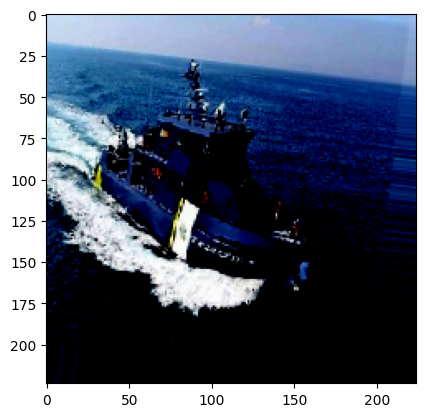

In [ ]:
# Retrieve a batch of data from the train_generator
batch = train_generator.next()

# Extract the images from the batch
images = batch[0]

# Display the first image from the batch
plt.imshow(images[0])
plt.show()


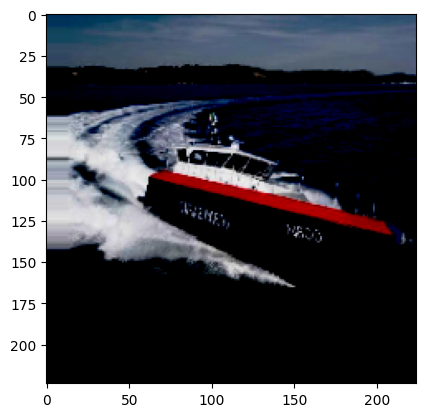

In [ ]:
batch = val_generator.next()

# Extract the images from the batch
images = batch[0]

# Display the first image from the batch
plt.imshow(images[0])
plt.show()

In [ ]:
opts = Adam(learning_rate = 0.0001, use_ema=True)
model.compile(loss='categorical_crossentropy',optimizer=opts,metrics=['accuracy'])
eps = 50
step_size_train = train_generator.n // train_generator.batch_size
step_size_val = val_generator.n // val_generator.batch_size

# check step_size_Train = step_size_val -> if not, adjust batch_size to make it equal
if step_size_train != step_size_val:
    print("Warning: step_size_train is not equal to step_size_val.")

    # Calculate a new batch size to make them equal
    new_batch_size = train_generator.n // step_size_val
    train_generator = datagen.flow_from_directory(
        './data_set/Ship/Train/',
        target_size=(224, 224),
        color_mode='rgb',
        batch_size=new_batch_size,
        class_mode='categorical',
        seed=seed_value,
        shuffle=True
    )
    step_size_train = train_generator.n // train_generator.batch_size

    print(f"Adjusted batch size to {new_batch_size} to make step_size_train equal to step_size_val.")


Found 97 images belonging to 3 classes.
Adjusted batch size to 48 to make step_size_train equal to step_size_val.


In [ ]:
history=model.fit_generator(generator=train_generator,
  steps_per_epoch=step_size_train,
  validation_data = val_generator,
  validation_steps = step_size_val,
  epochs=eps,
  verbose = 1)

<ipython-input-43-d96f39205c6f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/50
2/2 [==============================] - 14s 2s/step - loss: 1.0858 - accuracy: 0.3750 - val_loss: 0.9404 - val_accuracy: 0.5625
Epoch 2/50
2/2 [==============================] - 4s 3s/step - loss: 0.8808 - accuracy: 0.6531 - val_loss: 0.7693 - val_accuracy: 0.6719
Epoch 3/50
2/2 [==============================] - 3s 3s/step - loss: 0.7476 - accuracy: 0.6531 - val_loss: 0.6099 - val_accuracy: 0.8750
Epoch 4/50
2/2 [==============================] - 5s 3s/step - loss: 0.6429 - accuracy: 0.6771 - val_loss: 0.6080 - val_accuracy: 0.6406
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 0.7210 - accuracy: 0.5510 - val_loss: 0.5377 - val_accuracy: 0.7344
Epoch 6/50
2/2 [==============================] - 3s 2s/step - loss: 0.5245 - accuracy: 0.7604 - val_loss: 0.4412 - val_accuracy: 0.9531
Epoch 7/50
2/2 [==============================] - 3s 2s/step - loss: 0.4461 - accuracy: 0.9271 - val_loss: 0.4578 - val_accuracy: 0.9219
Epoch 8/50
2/2 [========================

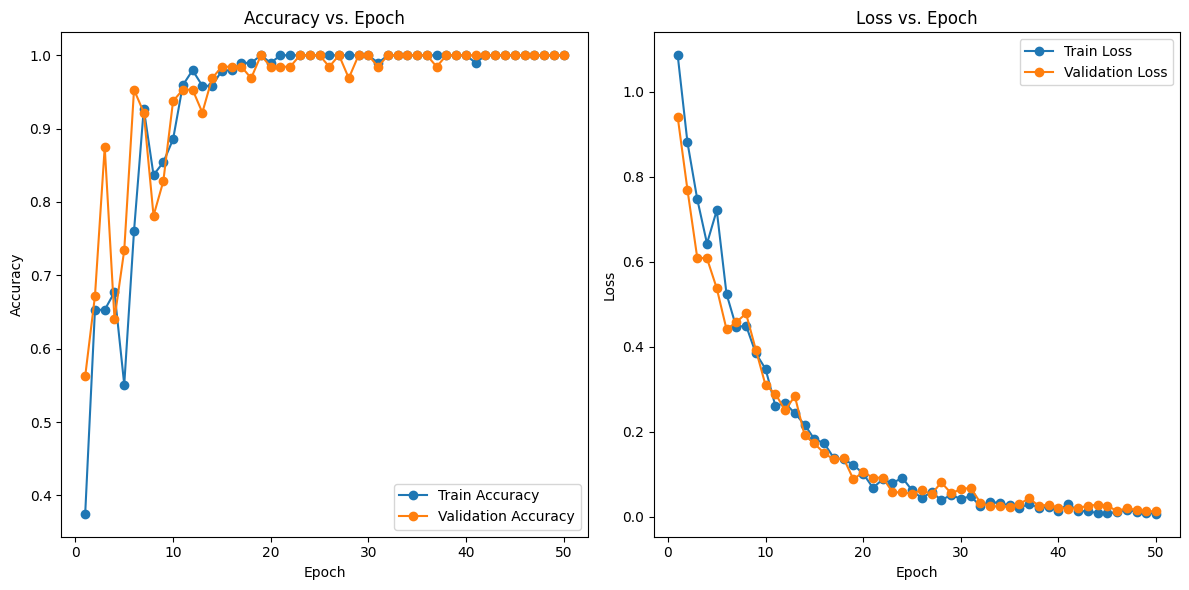

In [ ]:
N = len(history.history['accuracy'])  # Number of epochs

# View Accuracy (Training, Validation)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, N+1), history.history["accuracy"], label="Train Accuracy", marker='o')
plt.plot(range(1, N+1), history.history["val_accuracy"], label="Validation Accuracy", marker='o')
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(range(1, N+1), history.history['loss'], label="Train Loss", marker='o')
plt.plot(range(1, N+1), history.history['val_loss'], label="Validation Loss", marker='o')
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Initial test generator
test_generator = datagen.flow_from_directory(
    'data_set/Ship/Test',  # Specify the path to the test data directory
    class_mode="categorical",
    target_size=(224, 224),
    color_mode="rgb",
    shuffle=False,
    batch_size=1
)

# Get class id for y_true
y_true = test_generator.classes

# Predict images according to test_generator
preds = model.predict_generator(test_generator)
print("Shape of preds:", preds.shape)
print("Predicted class probabilities:")
print(preds)


Found 15 images belonging to 3 classes.


<ipython-input-46-50bf93a56da6>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


Shape of preds: (15, 3)
Predicted class probabilities:
[[0.49786758 0.47157297 0.0305594 ]
 [0.48220012 0.43407324 0.08372658]
 [0.44253084 0.4473326  0.11013655]
 [0.57625556 0.21105798 0.21268645]
 [0.05450254 0.86227375 0.08322377]
 [0.100428   0.8499481  0.04962396]
 [0.15440784 0.6827778  0.16281435]
 [0.12534381 0.7947789  0.07987731]
 [0.02391557 0.9214779  0.05460651]
 [0.08730657 0.7806863  0.13200714]
 [0.15137558 0.09738245 0.7512419 ]
 [0.0749744  0.14101519 0.7840104 ]
 [0.19945814 0.28029457 0.5202473 ]
 [0.22325915 0.15456036 0.62218046]
 [0.03013863 0.12614283 0.8437186 ]]


In [ ]:
# Predicted class labels (the class with the highest probability)
y_pred = np.argmax(preds, axis=1)

# True class labels
y_true = test_generator.classes

# Print true class labels and predicted class labels
print("True class labels:")
print(y_true)
print("Predicted class labels:")
print(y_pred)

# Calculate and print the confusion matrix
confusion = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion)

# Calculate and print the classification report
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

True class labels:
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
Predicted class labels:
[0 0 1 0 1 1 1 1 1 1 2 2 2 2 2]
Confusion Matrix:
[[3 1 0]
 [0 6 0]
 [0 0 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         5

    accuracy                           0.93        15
   macro avg       0.95      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 20ms/step


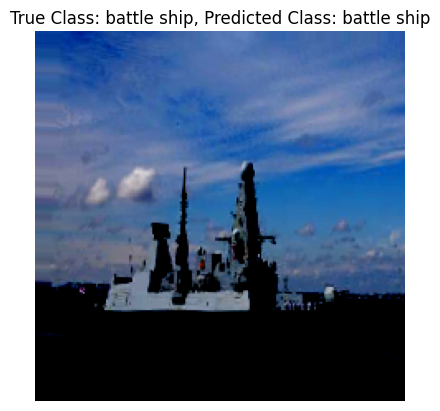

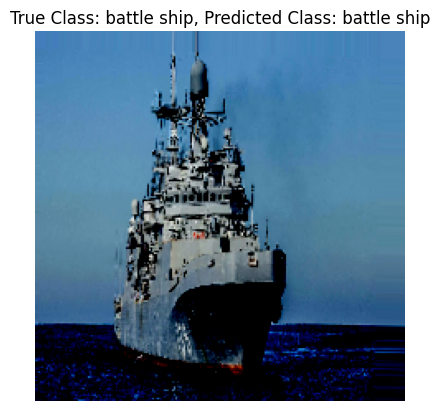

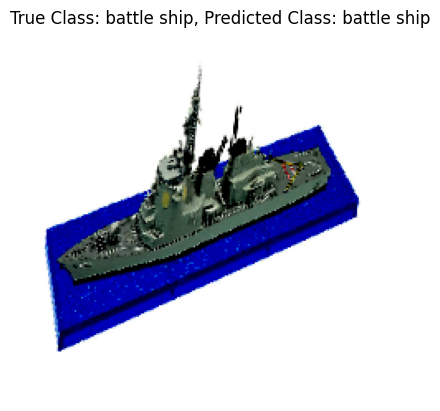

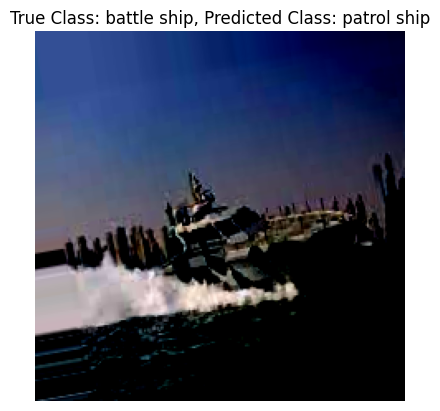

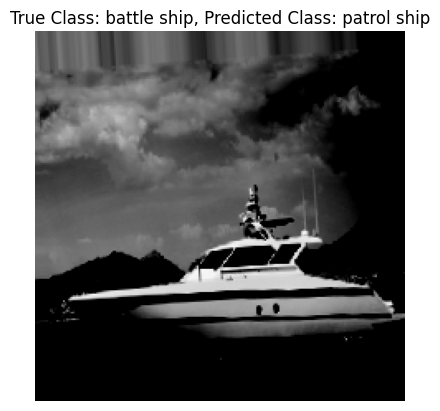

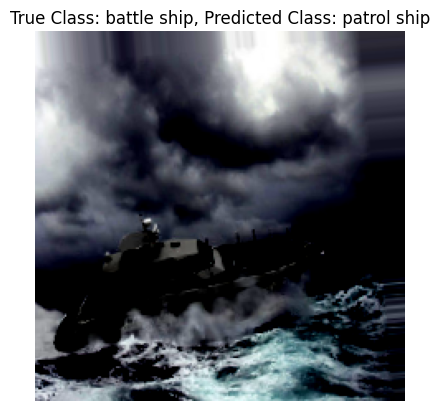

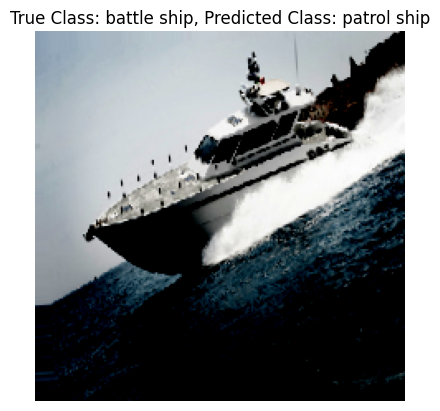

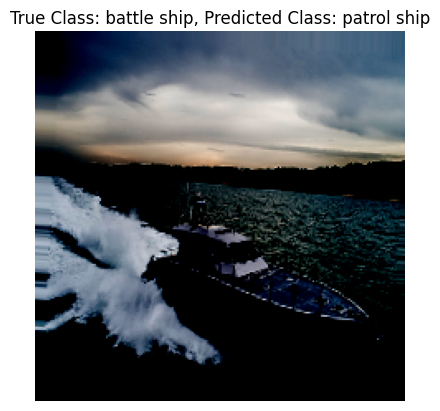

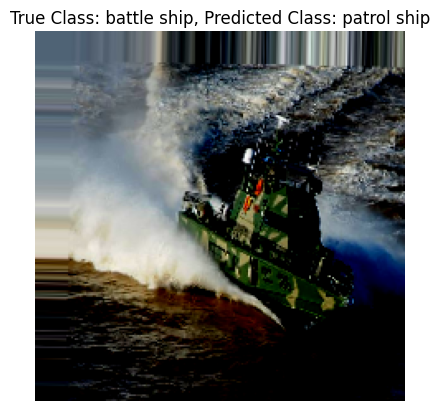

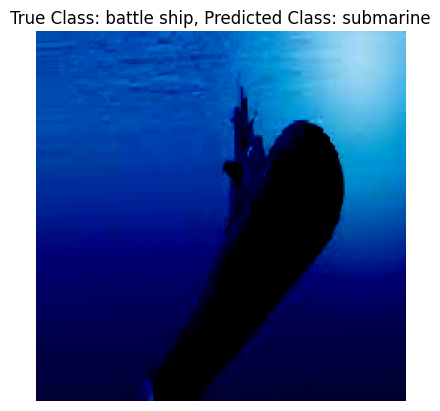

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined test_generator, model, and y_true as mentioned earlier

# Define class labels (replace with your class labels)
class_labels = ["battle ship", "patrol ship", "submarine"]

# Get 10 batches of test data (batch_size=1)
for _ in range(10):
    test_batch = test_generator.next()

    # Extract the image and true class label
    image = test_batch[0][0]  # Extract the image from the batch
    true_class = y_true[0]    # Get the true class label for the first image in the batch

    # Predict the class probabilities for the image
    pred_probabilities = model.predict(np.expand_dims(image, axis=0))
    predicted_class = np.argmax(pred_probabilities)

    # Display the image
    plt.figure()
    plt.imshow(image)
    plt.title(f"True Class: {class_labels[true_class]}, Predicted Class: {class_labels[predicted_class]}")
    plt.axis('off')

plt.show()
